# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [36]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import pandas as pd
import numpy as np

# TODO: Number of training examples
n_train = y_train.size

# TODO: Number of validation examples
n_validation = y_valid.size

# TODO: Number of testing examples.
n_test = y_test.size

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1] * X_train.shape[2]

# TODO: How many unique classes/labels there are in the dataset.
train_pd = pd.DataFrame(y_train)
valid_pd = pd.DataFrame(y_valid)
test_pd = pd.DataFrame(y_test)
# left the test set out as I'm not sure I should be looking at this at all until testing?
frames = [train_pd, valid_pd]
all_labels_pd = pd.concat(frames)
n_classes = len(all_labels_pd[0].unique())

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = 1024
Number of classes = 43
4410


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Plot of labels in training set


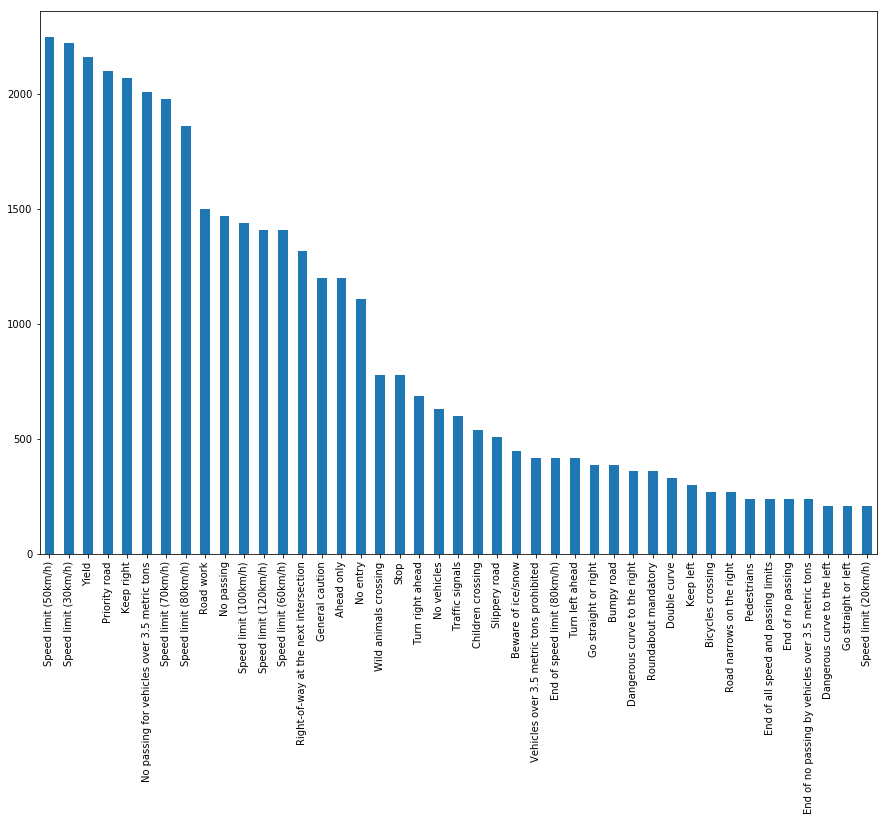

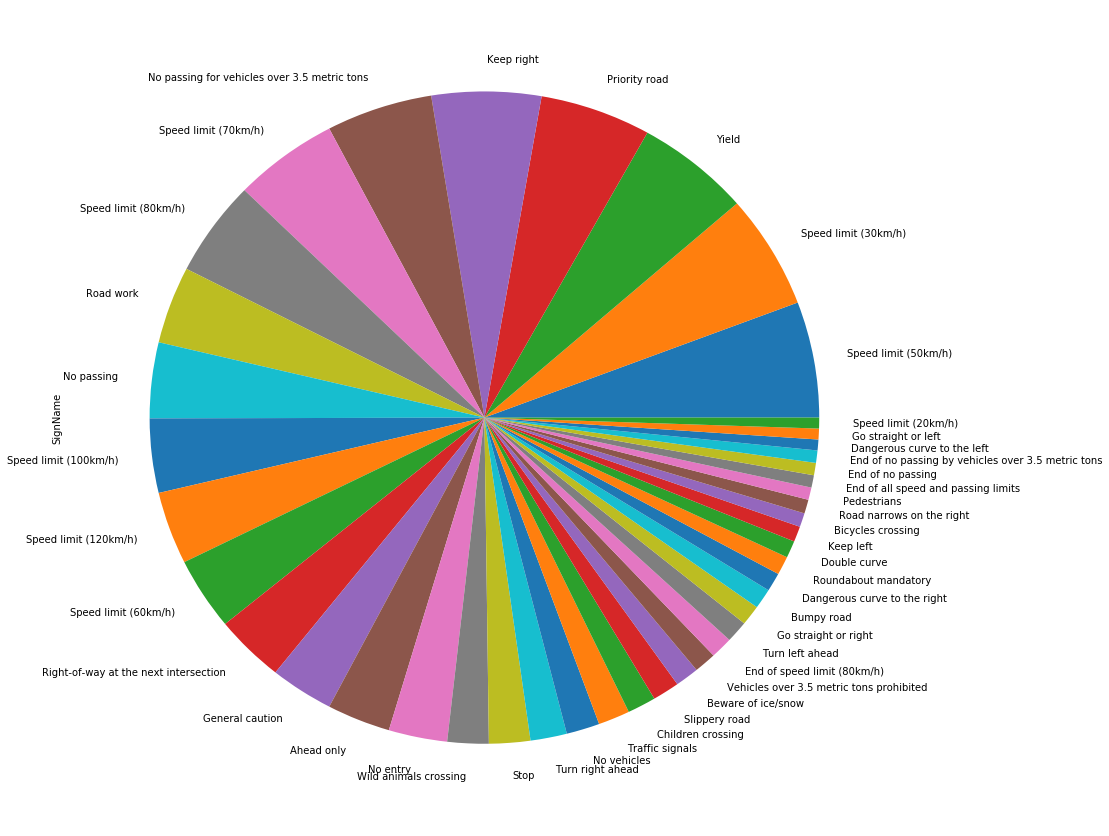

Speed limit (50km/h)                                  2250
Speed limit (30km/h)                                  2220
Yield                                                 2160
Priority road                                         2100
Keep right                                            2070
No passing for vehicles over 3.5 metric tons          2010
Speed limit (70km/h)                                  1980
Speed limit (80km/h)                                  1860
Road work                                             1500
No passing                                            1470
Speed limit (100km/h)                                 1440
Speed limit (120km/h)                                 1410
Speed limit (60km/h)                                  1410
Right-of-way at the next intersection                 1320
General caution                                       1200
Ahead only                                            1200
No entry                                              11

In [40]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.

signnames = pd.read_csv('signnames.csv')
all_labels_pd = all_labels_pd.rename(columns={0:'ClassId'})
labels_with_names = pd.merge(all_labels_pd, signnames, how='inner', on='ClassId')

%matplotlib inline

print("Plot of labels in training set")
plt.figure(figsize=(15,10))
labels_with_names['SignName'].value_counts().plot(kind="bar")
plt.show()
plt.figure(figsize=(15,15))
labels_with_names['SignName'].value_counts().plot(kind="pie")
plt.show()
print(labels_with_names['SignName'].value_counts())

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# using skimage to grayscale
from skimage.color import rgb2gray
import cv2
from random import randint

# pre-process images
def process_images(X_data):
    out_data = []
    
    for i, img in enumerate(X_data):
        # make image grayscale
        img_grey = rgb2gray(img)
        
        # normalize
        img_nrml = img_grey * (255.0/img_grey.max())
        
        out_data.append(np.asarray(img_nrml).reshape((32, 32, 1)))
    
    return out_data
    #return np.array(out_data)

# testing on smaller batches
#print(X_train[0].shape)
#print(X_train[0:10])
#print(process_images(X_train[0:10])[0].shape)

# process all datasets
X_train_processed = process_images(X_train)
X_valid_processed = process_images(X_valid)
X_test_processed = process_images(X_test)

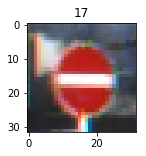

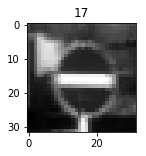

In [5]:
# checking image to see quality of transforms
idx = randint(0,len(X_train_processed))
test_image = X_train[idx].squeeze()
proc_image = X_train_processed[idx].squeeze()
label = y_train[idx]

plt.figure(figsize=(2,2))
plt.imshow(test_image)
plt.title(label)
plt.show()

plt.figure(figsize=(2,2))
plt.imshow(proc_image, cmap='gray')
plt.title(label)
plt.show()

## Generate additional data

From a few web-sources (primarily http://benanne.github.io/2014/04/05/galaxy-zoo.html from a Kaggle competition) generating additional data looks like a good idea to augment my training set.  As I'm not too versed in doing this manually I'm going to use Keras to do this (see https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html and https://chsasank.github.io/keras-tutorial.html).  I'm not using Keras in the rest of the pipe-line however.

In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

def generate_more_images(X, Y, num_img_to_gen = 5):
    datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=False,
            fill_mode='nearest')

    new_X = [X[i] for i in range(len(X))]
    new_Y = [Y[i] for i in range(len(Y))]
    
    for x, y in zip(X, Y):
        i = 0
        shape_img = x.shape
        x = x.reshape((1,) + shape_img)

        for batch in datagen.flow(x, batch_size=1):
            i += 1
            
            # append transformed batch
            new_X.append(batch.reshape(shape_img))
            new_Y.append(y)
            
            if i > num_img_to_gen:
                break
                
    return new_X, new_Y

original_len = len(X_train_processed)
print(original_len, " examples before generation")
X_train_addtl_data, y_train_addtl_data = generate_more_images(X_train_processed, y_train)
print(len(X_train_addtl_data), " examples after generation")

# I am not sure why this says "Using Theano" as it's configured to use TensorFlow.
# It didn't affect anything in this case as I'm not actually training with Keras.

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


34799  examples before generation
243593  examples after generation


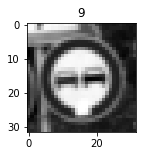

In [47]:
# verify a random image
idx = randint(original_len,len(X_train_addtl_data)-1)
plt.figure(figsize=(2,2))
plt.imshow(X_train_addtl_data[idx].squeeze(), cmap='gray')
plt.title(y_train_addtl_data[idx])
plt.show()

### Model Architecture

Started with the LeNet model as our base

In [19]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# started with LeNet
def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # add dropout
    conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)

    # SOLUTION: Pooling. Input = 28x28x12. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name="conv2") + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x24. Output = 600.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 600. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
# adding variable for dropout, don't want to dropout in validation...!
keep_prob = tf.placeholder(tf.float32)

In [21]:
# parameters
rate = 0.001
EPOCHS = 15
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [22]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Training the model

### Training a model against generated data

In [23]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_addtl_data)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_addtl_data, y_train_addtl_data = shuffle(X_train_addtl_data, y_train_addtl_data)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_addtl_data[offset:end], y_train_addtl_data[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.7})
            
        validation_accuracy = evaluate(X_valid_processed, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

        
    saver.save(sess, './trained-img-model')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.588

EPOCH 2 ...
Validation Accuracy = 0.849

EPOCH 3 ...
Validation Accuracy = 0.933

EPOCH 4 ...
Validation Accuracy = 0.943

EPOCH 5 ...
Validation Accuracy = 0.947

EPOCH 6 ...
Validation Accuracy = 0.954

EPOCH 7 ...
Validation Accuracy = 0.964

EPOCH 8 ...
Validation Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.967

EPOCH 10 ...
Validation Accuracy = 0.962

EPOCH 11 ...
Validation Accuracy = 0.964

EPOCH 12 ...
Validation Accuracy = 0.967

EPOCH 13 ...
Validation Accuracy = 0.959

EPOCH 14 ...
Validation Accuracy = 0.955

EPOCH 15 ...
Validation Accuracy = 0.968

Model saved


### Evaluate model against test set

In [24]:
with tf.Session() as sess:
    saver.restore(sess, './trained-img-model')

    test_accuracy = evaluate(X_test_processed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

Test Accuracy = 0.950


## Validate model

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

## Print signs from CSV
Couldn't figure out which corresponded to which when Googling so I wrote this to show me the signs and labels.

Speed limit (30km/h)
16 : Vehicles over 3.5 metric tons prohibited


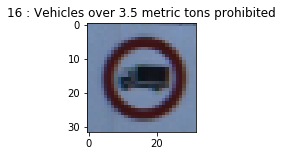

1 : Speed limit (30km/h)


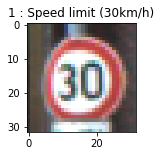

38 : Keep right


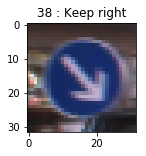

33 : Turn right ahead


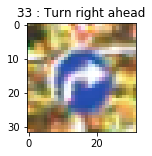

11 : Right-of-way at the next intersection


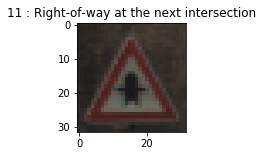

18 : General caution


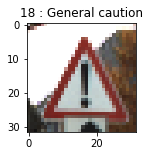

12 : Priority road


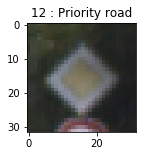

25 : Road work


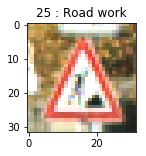

35 : Ahead only


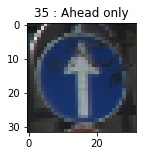

7 : Speed limit (100km/h)


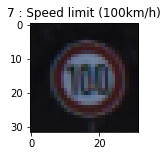

23 : Slippery road


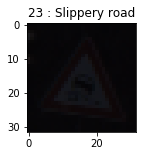

4 : Speed limit (70km/h)


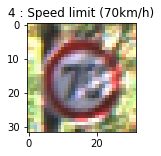

9 : No passing


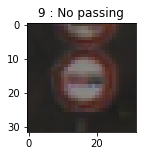

21 : Double curve


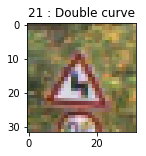

20 : Dangerous curve to the right


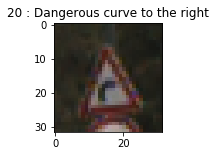

27 : Pedestrians


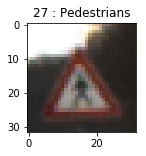

3 : Speed limit (60km/h)


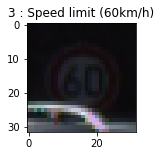

13 : Yield


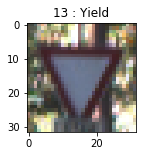

10 : No passing for vehicles over 3.5 metric tons


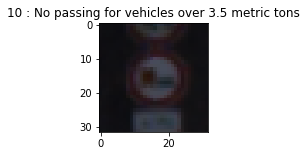

5 : Speed limit (80km/h)


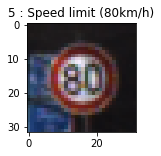

17 : No entry


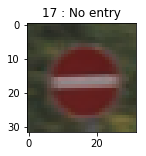

34 : Turn left ahead


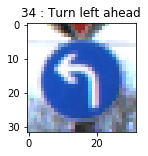

2 : Speed limit (50km/h)


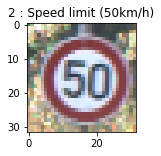

8 : Speed limit (120km/h)


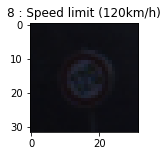

30 : Beware of ice/snow


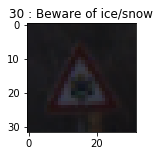

24 : Road narrows on the right


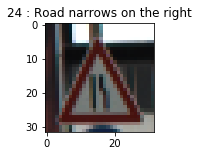

15 : No vehicles


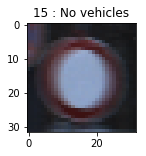

26 : Traffic signals


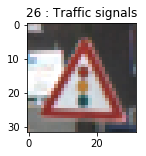

28 : Children crossing


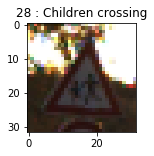

22 : Bumpy road


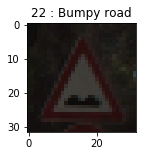

14 : Stop


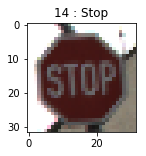

32 : End of all speed and passing limits


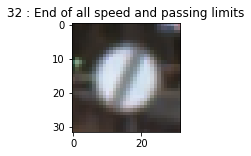

29 : Bicycles crossing


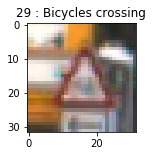

6 : End of speed limit (80km/h)


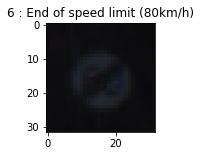

36 : Go straight or right


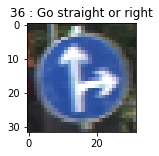

40 : Roundabout mandatory


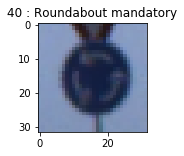

41 : End of no passing


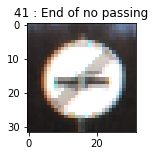

31 : Wild animals crossing


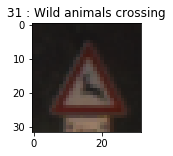

19 : Dangerous curve to the left


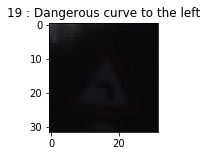

0 : Speed limit (20km/h)


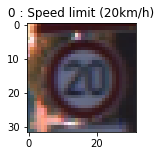

39 : Keep left


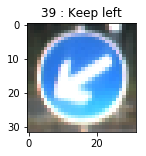

42 : End of no passing by vehicles over 3.5 metric tons


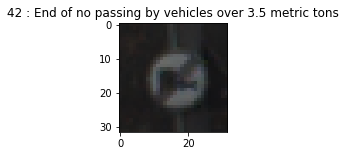

37 : Go straight or left


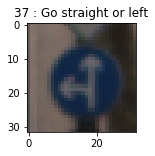

In [25]:
print(signnames.loc[signnames['ClassId'] ==  1, 'SignName'].iloc[0])

n_classes
seen_signs = []

for i, (sign, classid) in enumerate(zip(X_test, y_test)):
    if classid not in seen_signs:
        label = str(classid) + " : " + signnames.loc[signnames['ClassId'] ==  classid, 'SignName'].iloc[0]
        print(label)
        plt.figure(figsize=(2,2))
        plt.imshow(sign)
        plt.title(label)
        plt.show()
        
        seen_signs.append(classid)
    
    if(len(seen_signs) >= n_classes):
        break

### Load and Output the Images

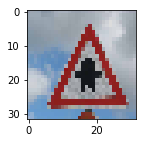

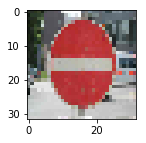

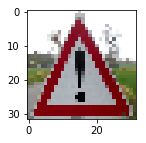

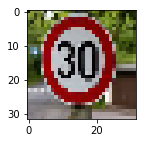

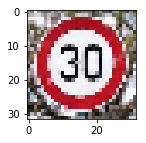

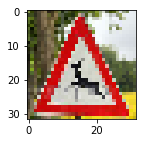

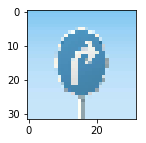

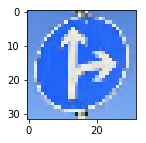

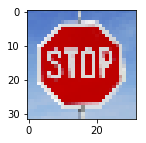

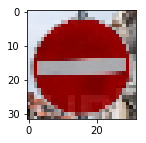

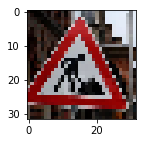

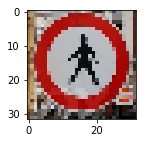

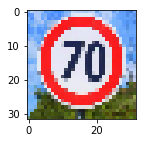

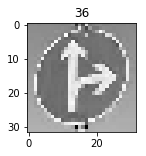

13 total images


In [26]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob, os

exts = ['*.jpg', '*.png', '*.gif']
imgdir = '.\\german-signs-web\\'
X_downloaded = []
y_downloaded = []
for ext in exts:
    # find all files
    for filename in glob.glob(imgdir+ext):
        imgFile = os.path.basename(filename)
        imgClass = int(imgFile.split("_")[0])
        
        # import image and resize with cv2
        im = cv2.imread(filename)
        im = cv2.resize(im, (32,32))
        
        X_downloaded.append(im)
        y_downloaded.append(imgClass)

# show images
for x_dl, y_dl in zip(X_downloaded, y_downloaded):
    plt.figure(figsize=(2,2))
    plt.imshow(cv2.cvtColor(x_dl, cv2.COLOR_BGR2RGB))
    plt.show()
        
# apply pre-process to fit our pipeline
X_downloaded_processed = process_images(X_downloaded)

# show random processed image
idx = randint(0,len(X_downloaded_processed)-1)
plt.figure(figsize=(2,2))
plt.imshow(X_downloaded_processed[idx].squeeze(), cmap='gray')
plt.title(y_downloaded[idx])
plt.show()

print(str(len(X_downloaded_processed)) + " total images")

### Predict the Sign Type for Each Image

Actual:  Right-of-way at the next intersection
Predicted:  Right-of-way at the next intersection


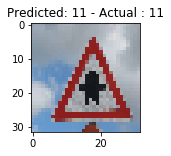

Actual:  No entry
Predicted:  No entry


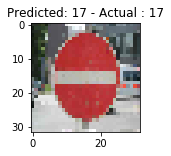

Actual:  General caution
Predicted:  General caution


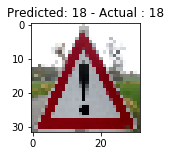

Actual:  Speed limit (30km/h)
Predicted:  Speed limit (30km/h)


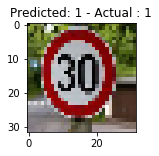

Actual:  Speed limit (30km/h)
Predicted:  Speed limit (30km/h)


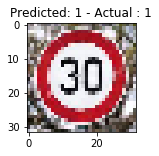

Actual:  Wild animals crossing
Predicted:  Wild animals crossing


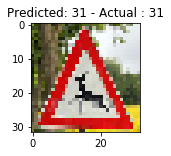

Actual:  Turn right ahead
Predicted:  Turn right ahead


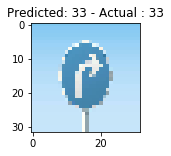

Actual:  Go straight or right
Predicted:  Go straight or right


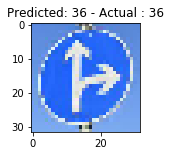

Actual:  Stop
Predicted:  Stop


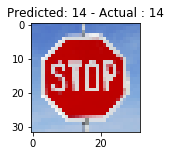

Actual:  No entry
Predicted:  No entry


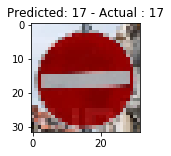

Actual:  Road work
Predicted:  Dangerous curve to the right


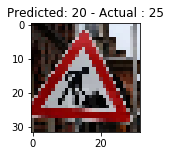

Actual:  Pedestrians
Predicted:  General caution


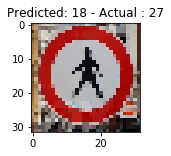

Actual:  Speed limit (70km/h)
Predicted:  Speed limit (70km/h)


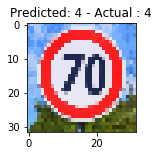

In [49]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# use logits in prediction operation
prediction=tf.argmax(logits,1)

with tf.Session() as sess:
    saver.restore(sess, './trained-img-model')

    #test_accuracy = evaluate(X_downloaded_processed, y_downloaded)
    predictions = sess.run(prediction, feed_dict={x: X_downloaded_processed, keep_prob: 1.0})

for i, (x_dl, y_dl) in enumerate(zip(X_downloaded, y_downloaded)):
    print("Actual: ",signnames.loc[signnames['ClassId'] ==  y_dl, 'SignName'].iloc[0])
    print("Predicted: ",signnames.loc[signnames['ClassId'] ==  predictions[i], 'SignName'].iloc[0])
    label = "Predicted: " + str(predictions[i]) + " - Actual : " + str(y_dl)
    plt.figure(figsize=(2,2))
    plt.imshow(cv2.cvtColor(x_dl, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.show()

### Analyze Performance

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './trained-img-model')

    test_accuracy = evaluate(X_downloaded_processed, y_downloaded)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.846


On the downloaded examples it got two wrong.  Will see how close it got and analyze further in the probabilities section below.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

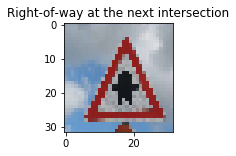

Predictions:
100.00% - Right-of-way at the next intersection
0.00% - Beware of ice/snow
0.00% - Pedestrians
0.00% - Double curve
0.00% - Turn right ahead


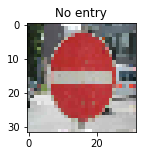

Predictions:
100.00% - No entry
0.00% - Stop
0.00% - Keep right
0.00% - Priority road
0.00% - Turn left ahead


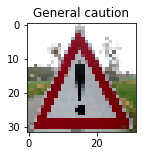

Predictions:
97.05% - General caution
2.91% - Traffic signals
0.04% - Pedestrians
0.00% - Road narrows on the right
0.00% - Road work


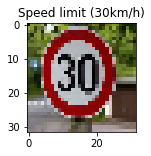

Predictions:
100.00% - Speed limit (30km/h)
0.00% - Speed limit (50km/h)
0.00% - Speed limit (20km/h)
0.00% - Speed limit (70km/h)
0.00% - Speed limit (100km/h)


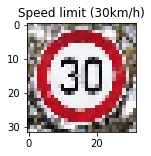

Predictions:
100.00% - Speed limit (30km/h)
0.00% - Speed limit (50km/h)
0.00% - Speed limit (20km/h)
0.00% - Speed limit (70km/h)
0.00% - Speed limit (100km/h)


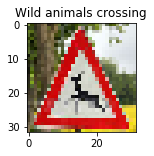

Predictions:
99.96% - Wild animals crossing
0.03% - Slippery road
0.01% - Double curve
0.00% - Dangerous curve to the left
0.00% - Bicycles crossing


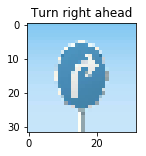

Predictions:
96.82% - Turn right ahead
1.72% - Speed limit (60km/h)
1.11% - Stop
0.16% - Speed limit (80km/h)
0.08% - Ahead only


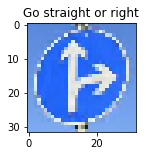

Predictions:
100.00% - Go straight or right
0.00% - Ahead only
0.00% - Turn left ahead
0.00% - Priority road
0.00% - Turn right ahead


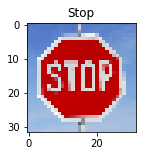

Predictions:
91.54% - Stop
4.43% - Speed limit (60km/h)
2.56% - Speed limit (80km/h)
0.72% - Speed limit (120km/h)
0.33% - Turn right ahead


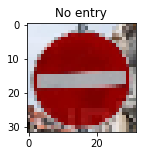

Predictions:
100.00% - No entry
0.00% - Stop
0.00% - Turn left ahead
0.00% - Priority road
0.00% - Keep right


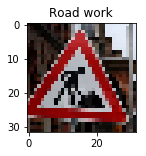

Predictions:
90.08% - Dangerous curve to the right
6.08% - Road work
2.57% - Children crossing
1.25% - Slippery road
0.01% - Dangerous curve to the left


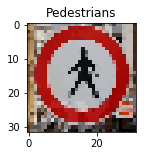

Predictions:
98.88% - General caution
0.66% - Speed limit (70km/h)
0.28% - Traffic signals
0.09% - Road work
0.05% - Pedestrians


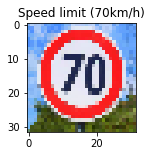

Predictions:
100.00% - Speed limit (70km/h)
0.00% - Speed limit (30km/h)
0.00% - Speed limit (20km/h)
0.00% - Speed limit (120km/h)
0.00% - Speed limit (50km/h)


In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_prob = tf.nn.softmax(logits)
top_five = tf.nn.top_k(softmax_prob, k=5)

with tf.Session() as sess:
    saver.restore(sess, './trained-img-model')
    test_softmax = sess.run(softmax_prob, feed_dict={x: X_downloaded_processed, keep_prob: 1.0})
    test_top_five = sess.run(top_five, feed_dict={x: X_downloaded_processed, keep_prob: 1.0})
    
for i, (x_dl, y_dl) in enumerate(zip(X_downloaded, y_downloaded)):
    label = signnames.loc[signnames['ClassId'] ==  y_dl, 'SignName'].iloc[0]
    plt.figure(figsize=(2,2))
    plt.imshow(cv2.cvtColor(x_dl, cv2.COLOR_BGR2RGB))
    plt.title(label)
    plt.show()
    
    print("Predictions:")
    for j in range(5):
        y_guess = test_top_five[1][i][j]
        y_guess_pct = test_top_five[0][i][j]*100
        y_guess_label = signnames.loc[signnames['ClassId'] ==  y_guess, 'SignName'].iloc[0]
        print("{p:2.2f}% - {l:s}".format(p=y_guess_pct, l=y_guess_label))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

[//]: # (Image References)

[labels_bar]: ./images/labels_barchart.png "Labels Bar Chart"
[labels_pie]: ./images/labels_piechart.png "Labels Pie Chart"
[preprocess_original]: ./images/preprocess_original.png "Pre-process original image"
[preprocess_processed]: ./images/preprocess_processed.png "Pre-process processed image"
[generated_image]: ./images/generated_image.png "Generated image"
[dl_sign_1]: ./german-signs-web/1_canstock14957677.jpg "DL Sign 1"
[dl_sign_2]: ./german-signs-web/33_467030179.jpg "DL Sign 2"
[dl_sign_3]: ./german-signs-web/14_1-Iiwrp2CLW7bhOopz7QTB5w.png "DL Sign 3"

### Here I will consider the [rubric points](https://review.udacity.com/#!/rubrics/481/view) individually and describe how I addressed each point in my implementation.  

---

Here is a link to my [project code](https://github.com/lawsim/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb)

### Data Set Summary & Exploration

#### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

I used numpy and pandas to calculate summary statistics of the traffic signs data set:

* The size of training set is 34799
* The size of the validation set is 4410
* The size of test set is 12630
* The shape of a traffic sign image is (32 x 32) = 1024
* The number of unique classes/labels in the data set is  43

#### 2. Include an exploratory visualization of the dataset.

Here are visualisations showing the dataset.  They are a bar and a pie chart showing the count of each unique label in the training set.

![alt text][labels_bar]
![alt text][labels_pie]

### Design and Test a Model Architecture

#### 1. Describe how you preprocessed the image data.

For processing the data, I first turned the image to grayscale as I believed the color data might not provide significantly different results but would increase training time and could possibly lower accuracy.  I also normalized the image per the recommendation in the notebook.

Before:
![alt text][preprocess_original]
After
![alt text][preprocess_processed]

I decided to look into generating additional data primarily because it was recommended in the assignment!  Some Google'ing later led me to an article (http://benanne.github.io/2014/04/05/galaxy-zoo.html) which described some of the techniques and reasons for data augmentation.

I explored a few different options such as creating various methods by hand, using scikit and eventually settled on using Keras' ImageDataGenerator for augmenting my data as it looked to have a variety of options available.  I elected to generate 5 additional images for each training example and experimented with different parameters until settling on:
* Rotation up to 20 degrees
* width and height shift up to 1/10
* shear angle up to 0.1 radians (~6 degrees)
* zoom up to 0.1

I did not use the ImageDataGenerator in the Keras pipeline itself as seems to be more common as I wanted to work off of the LeNet Tensorflow implementation we started with.  Instead, I appended the data to the original dataset as the program went through the batches.

Here is an example of a generated image:

![alt text][generated_image]


#### 2. Describe what your final model architecture looks like.

I started with the LeNet model defined in the previous assignment.  From there I modified some of the original parameters adding additional depth to convolution layers and adding dropout in between a couple of places in the model.

My final model consisted of the following layers:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 Grayscale image   					| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x12 	|
| RELU					|												|
| Dropout				| Keep prob of 70% in train set					|
| Max pooling	      	| 2x2 stride, outputs 14x14x6 					|
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 10x10x16 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride, outputs 5x5x24 					|
| Flatten		      	| To 600					 					|
| Fully connected		| Input of 600, output 120						|
| RELU					|												|
| Fully connected		| Input of 120, output 84						|
| RELU					|												|
| Dropout				| Keep prob of 70% in train set					|
| Fully connected		| Input of 84, output 43						|

#### 3. Describe how you trained your model.

For the model, I landed on a learning rate of 0.001, 15 epochs and a batch size of 128 for my parameters.  I used the same Adam Optimizer from the lab.  I first trained both the augmented and non-augmented data set to see if it performed better (it did).

I seemed to be getting diminishing returns above 10 epochs on some runs but on others it was proving helpful so I left it.  After I achieved results I was happy with I ran against the test set.

#### 4. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93.

My final model results were:
* validation set accuracy of 0.968
* test set accuracy of 0.950

I ended up building on top of the LeNet architecture from the previous lesson.  I read about a few other architectures which seem to perform better (https://medium.com/towards-data-science/neural-network-architectures-156e5bad51ba) but decided I would rather iterate on the one from the class as it might be more informative to me.

I started by just running the LeNet architecture against the data set.  With this, I couldn't achieve above around 0.88 accuracy.  I adjusted the architecture by adding dropout in a couple of points as well as adjusting the output depth in some of the convolutions.

I believe accuracy could be improved further by implementing some of the models/ideas in the previously linked article but it was functional for the project and I understood it well.

### Test a Model on New Images

#### 1. Choose at least five German traffic signs found on the web and provide them in the report.

I ended up downloading more than five images as at first I was receiving 100% accuracy and I wanted to be sure I didn't somehow stumble upon images already in the set.  In the interest of space I will only link a handful.

![alt text][dl_sign_1] ![alt text][dl_sign_2] ![alt text][dl_sign_3]

I scaled and pre-processed the signs before applying the classifier to them.

#### 2. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set.

Here are the results of the prediction:

| Image			        |     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| Right-of-way at the next intersection      		| Stop sign   									| 
| No entry     			| No entry 										|
| General caution					| General caution											|
| Speed limit (30km/h) 		| Speed limit (30km/h)				 				|
| Speed limit (30km/h) 			| Speed limit (30km/h)       							|
| Wild animals crossing 			| Wild animals crossing       							|
| Turn right ahead 			| Turn right ahead       							|
| Go straight or right 			| Go straight or right       							|
| Stop 			| Stop       							|
| No entry 			| No entry       							|
| Road work 			| Dangerous curve to the right       							|
| Pedestrians 			| General caution       							|
| Speed limit (70km/h) 			| Speed limit (70km/h)       							|

I had an accuracy of 84% on this data.  It's hard to say if this is favorable or not because the set of data I used is so small.  For the ones that were wrong, perhaps the resolution is so low that it makes it difficult for the classifier to accurately predict the signs.  A larger training set, higher resolution or an improved model may all improve these results.

#### 3. Describe how certain the model is when predicting on each of the new images by looking at the softmax probabilities for each prediction.

The model was far more certain than I expected in all of the cases despite being completely wrong in two guesses.  It was 100% certain of the correct result for:
* Right-of-way at the next intersection
* No entry
* Speed limit (30km/h)
* Speed limit (30km/h)
* Go straight or right
* No entry
* Speed limit (70km/h)

For some of the others it was correct on it was very certain of the correct result. General caution, for instance:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 97.05%      			| General caution   									| 
| 2.91%     				| Traffic signals 										|
| 0.04%					| Pedestrians											|
| 0.00%	      			| Road narrows on the right					 				|
| 0.00%				    | Road work      							|


However, on the two incorrect choices it was very certain of the wrong result.

Road Work:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 90.08%      			| Dangerous curve to the right   									| 
| 6.08%      			| Road work   									| 
| 2.57%      			| Children crossing   									| 
| 1.25%      			| Slippery road   									| 
| 0.01%      			| Dangerous curve to the left   									| 

Pedestrians:

| Probability         	|     Prediction	        					| 
|:---------------------:|:---------------------------------------------:| 
| 98.88%      			| General caution   									| 
| 0.66%      			| Speed limit (70km/h)   									| 
| 0.28%      			| Traffic signals   									| 
| 0.09%      			| Road work   									| 
| 0.05%      			| Pedestrians   									| 




